In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Operações com o dado licitação

#### O separador do arquigo é vírgula, porém o DS_OBJETO às vezes tinha vírgula na decrição, então dei um sed s/, / /g para substituir as vírgulas espaço por espaço

In [2]:
licitacoes=pd.read_csv('2019/licitacao_editada.csv', sep = ',', low_memory=False)

In [3]:
print(licitacoes.columns.values)

['CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE'
 'NR_COMISSAO' 'ANO_COMISSAO' 'TP_COMISSAO' 'NR_PROCESSO' 'ANO_PROCESSO'
 'TP_OBJETO' 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'TP_NIVEL_JULGAMENTO'
 'DT_AUTORIZACAO_ADESAO' 'TP_CARACTERISTICA_OBJETO' 'TP_NATUREZA'
 'TP_REGIME_EXECUCAO' 'BL_PERMITE_SUBCONTRATACAO' 'TP_BENEFICIO_MICRO_EPP'
 'TP_FORNECIMENTO' 'TP_ATUACAO_REGISTRO' 'NR_LICITACAO_ORIGINAL'
 'ANO_LICITACAO_ORIGINAL' 'NR_ATA_REGISTRO_PRECO' 'DT_ATA_REGISTRO_PRECO'
 'PC_TAXA_RISCO' 'TP_EXECUCAO' 'TP_DISPUTA' 'TP_PREQUALIFICACAO'
 'BL_INVERSAO_FASES' 'TP_RESULTADO_GLOBAL' 'CNPJ_ORGAO_GERENCIADOR'
 'NM_ORGAO_GERENCIADOR' 'DS_OBJETO' 'CD_TIPO_FUNDAMENTACAO' 'NR_ARTIGO'
 'DS_INCISO' 'DS_LEI' 'DT_INICIO_INSCR_CRED' 'DT_FIM_INSCR_CRED'
 'DT_INICIO_VIGEN_CRED' 'DT_FIM_VIGEN_CRED' 'VL_LICITACAO'
 'BL_ORCAMENTO_SIGILOSO' 'BL_RECEBE_INSCRICAO_PER_VIG'
 'BL_PERMITE_CONSORCIO' 'DT_ABERTURA' 'DT_HOMOLOGACAO' 'DT_ADJUDICACAO'
 'BL_LICIT_PROPRIA_ORGAO' 'TP_DOCUMENTO_FORNE

In [4]:
licitacoes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,53100,PM DE NOVA PALMA,3.0,2019,TMP,6679.0,2018.0,P,101,2019,...,NaN,NaN,J,9616071000198,272269.69,S,NaN,NaN,NaN,N
1,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,35,2019,...,NaN,NaN,J,9616071000198,75363.72,S,NaN,NaN,NaN,N
2,51802,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,1.0,2018.0,P,3,2019,...,NaN,NaN,J,23178651000171,126240.00,N,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,326.0,2017.0,P,415,2019,...,NaN,NaN,J,90167065000119,9600.00,S,NaN,NaN,NaN,N
4,86800,PM DE BOA VISTA DO SUL,3.0,2019,PRP,4.0,2019.0,G,4,2019,...,NaN,NaN,J,2934207000169,430770.00,S,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70541,58706,INST. APOS. PENSÕES SERV. MUN. - SÃO LEOPOLDO,24.0,2019,PRD,NaN,NaN,NaN,3429,2019,...,J,360305000104,NaN,NaN,NaN,S,NaN,NaN,NaN,N
70542,56900,PM DE SANTA MARIA,39.0,2019,PRI,NaN,NaN,NaN,214,2019,...,J,2191788000196,NaN,NaN,NaN,S,NaN,NaN,NaN,N
70543,58701,CM DE SÃO LEOPOLDO,2.0,2019,PRI,NaN,NaN,NaN,2,2019,...,J,125392000115,NaN,NaN,NaN,S,NaN,NaN,NaN,N
70544,88029,PM DE CORONEL PILAR,28.0,2019,PRP,44.0,2019.0,P,824,2019,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N


# Checando quantos valores faltantes existem

In [5]:
pd.set_option('display.max_rows', 1000)
print("Missing values: ", licitacoes.isnull().sum())

Missing values:  CD_ORGAO                           0
NM_ORGAO                           0
NR_LICITACAO                       0
ANO_LICITACAO                      0
CD_TIPO_MODALIDADE                 0
NR_COMISSAO                    27962
ANO_COMISSAO                   27962
TP_COMISSAO                    27951
NR_PROCESSO                       84
ANO_PROCESSO                      83
TP_OBJETO                          0
CD_TIPO_FASE_ATUAL                 0
TP_LICITACAO                       0
TP_NIVEL_JULGAMENTO               24
DT_AUTORIZACAO_ADESAO          69786
TP_CARACTERISTICA_OBJETO           0
TP_NATUREZA                       24
TP_REGIME_EXECUCAO             55628
BL_PERMITE_SUBCONTRATACAO      24170
TP_BENEFICIO_MICRO_EPP            12
TP_FORNECIMENTO                36646
TP_ATUACAO_REGISTRO            63607
NR_LICITACAO_ORIGINAL          69763
ANO_LICITACAO_ORIGINAL         58135
NR_ATA_REGISTRO_PRECO          69764
DT_ATA_REGISTRO_PRECO          69781
PC_TAXA_RISCO        

# Escolhendo as principais colunas e com poucos valores faltantes para formação do dataframe

In [3]:
df = licitacoes.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO']]

In [93]:
df

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO
0,53100,PM DE NOVA PALMA,3.0,2019,TMP,101,2019,CSE,ADH,MPR,CONTRATAÇÃO GLOBAL DE EMPRESA PARA CONSTRUÇÃO ...,276405.12
1,53100,PM DE NOVA PALMA,1.0,2019,TMP,35,2019,OSE,ADH,MPR,Reforma da UBS do Distrito da Vila Cruz pintur...,75396.00
2,51802,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,3,2019,PER,ADH,MOP,Constitui objeto da presente Licitação a explo...,105612.48
3,84100,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,415,2019,OUS,ADH,MPR,Contratação de serviços de arbitragem para atu...,10600.00
4,86800,PM DE BOA VISTA DO SUL,3.0,2019,PRP,4,2019,OUS,ADH,MPR,Contratação de empresa para prestação de servi...,430770.00
...,...,...,...,...,...,...,...,...,...,...,...,...
70541,58706,INST. APOS. PENSÕES SERV. MUN. - SÃO LEOPOLDO,24.0,2019,PRD,3429,2019,OUS,PUB,NSA,Elaboração de 01(um) cálculo atuarial referent...,6100.00
70542,56900,PM DE SANTA MARIA,39.0,2019,PRI,214,2019,COM,PUB,NSA,Fornecimento de passagem escolar urbana,76810.50
70543,58701,CM DE SÃO LEOPOLDO,2.0,2019,PRI,2,2019,CSE,PUB,NSA,Prestação de serviço de suporte técnico de man...,11585.40
70544,88029,PM DE CORONEL PILAR,28.0,2019,PRP,824,2019,OUS,HAP,MPR,Contratação de empresa para pintura do prédio ...,15466.15


### Alguns valores no campo valor licitação estava com valores S e N que seriam de outra coluna, então tirei as linhas que estavam com esses valores errôneos

In [4]:
new_df = df[df.VL_LICITACAO != ('S' or 'N')]

In [95]:
new_df

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO
0,53100,PM DE NOVA PALMA,3.0,2019,TMP,101,2019,CSE,ADH,MPR,CONTRATAÇÃO GLOBAL DE EMPRESA PARA CONSTRUÇÃO ...,276405.12
1,53100,PM DE NOVA PALMA,1.0,2019,TMP,35,2019,OSE,ADH,MPR,Reforma da UBS do Distrito da Vila Cruz pintur...,75396.00
2,51802,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,3,2019,PER,ADH,MOP,Constitui objeto da presente Licitação a explo...,105612.48
3,84100,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,415,2019,OUS,ADH,MPR,Contratação de serviços de arbitragem para atu...,10600.00
4,86800,PM DE BOA VISTA DO SUL,3.0,2019,PRP,4,2019,OUS,ADH,MPR,Contratação de empresa para prestação de servi...,430770.00
...,...,...,...,...,...,...,...,...,...,...,...,...
70541,58706,INST. APOS. PENSÕES SERV. MUN. - SÃO LEOPOLDO,24.0,2019,PRD,3429,2019,OUS,PUB,NSA,Elaboração de 01(um) cálculo atuarial referent...,6100.00
70542,56900,PM DE SANTA MARIA,39.0,2019,PRI,214,2019,COM,PUB,NSA,Fornecimento de passagem escolar urbana,76810.50
70543,58701,CM DE SÃO LEOPOLDO,2.0,2019,PRI,2,2019,CSE,PUB,NSA,Prestação de serviço de suporte técnico de man...,11585.40
70544,88029,PM DE CORONEL PILAR,28.0,2019,PRP,824,2019,OUS,HAP,MPR,Contratação de empresa para pintura do prédio ...,15466.15


# Checando os valores faltantes do novo dataframe

In [96]:
print("Missing values: ", new_df.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO             84
ANO_PROCESSO            83
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO               73
VL_LICITACAO          3509
dtype: int64


# Como todos os processos são de 2019, posso preencher todas as linhas do ano do processo pelo ano 2019, e assim não haverá dados faltantes nessa coluna

In [5]:
new_df.loc[:,'ANO_PROCESSO'] = 2019

/home/thais/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Removendo as linhas que contém dados faltantes

In [6]:
licitacoes_nova = new_df.dropna(subset=['NR_PROCESSO', 'DS_OBJETO', 'VL_LICITACAO'])

In [99]:
print("Missing values: ", licitacoes_nova.isnull().sum())

Missing values:  CD_ORGAO              0
NM_ORGAO              0
NR_LICITACAO          0
ANO_LICITACAO         0
CD_TIPO_MODALIDADE    0
NR_PROCESSO           0
ANO_PROCESSO          0
TP_OBJETO             0
CD_TIPO_FASE_ATUAL    0
TP_LICITACAO          0
DS_OBJETO             0
VL_LICITACAO          0
dtype: int64


In [100]:
for column in licitacoes_nova.columns:
     print("\n" + column)
     print(licitacoes_nova[column].value_counts())


CD_ORGAO
49300    846
49100    747
46900    707
58300    685
53400    653
        ... 
56702      1
66501      1
88230      1
78801      1
88068      1
Name: CD_ORGAO, Length: 1023, dtype: int64

NM_ORGAO
PM DE GUAPORÉ                                        846
PM DE GRAVATAÍ                                       747
PM DE ERECHIM                                        707
PM DE SÃO GABRIEL                                    685
PM DE NOVO HAMBURGO                                  653
                                                    ... 
CM DE PINHEIRO MACHADO                                 1
INST. PREV. SERV. TIT. CARGO EFET. MUN. CARAZINHO      1
CM DE CANUDOS DO VALE                                  1
CM DE SÃO VALENTIM DO SUL                              1
INST. PREV. ASSIST. MUN. - NOVA PRATA                  1
Name: NM_ORGAO, Length: 1023, dtype: int64

NR_LICITACAO
1.000000e+00    3789
2.000000e+00    2941
3.000000e+00    2435
4.000000e+00    2148
5.000000e+00    1955
     

# Selecionando as licitações cujo TP_OBJETO seja compra, como foi sugerido no pdf da descrição do teste técnico

In [7]:
licitacoes_compra = licitacoes_nova[licitacoes_nova['TP_OBJETO'] == 'COM']

# Checando se há linhas duplicadas

In [126]:
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Convertendo a coluna de VL_LICITAÇÃO em float

In [8]:
licitacoes_compra['VL_LICITACAO'] = pd.to_numeric(licitacoes_compra['VL_LICITACAO'],errors='coerce')
licitacoes_compra.dtypes

/home/thais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CD_ORGAO                int64
NM_ORGAO               object
NR_LICITACAO          float64
ANO_LICITACAO           int64
CD_TIPO_MODALIDADE     object
NR_PROCESSO            object
ANO_PROCESSO            int64
TP_OBJETO              object
CD_TIPO_FASE_ATUAL     object
TP_LICITACAO           object
DS_OBJETO              object
VL_LICITACAO          float64
dtype: object

# Checando a estatística dos valores de licitação

In [9]:
licitacoes_compra['VL_LICITACAO'].describe()

count    2.002100e+04
mean     4.623642e+05
std      1.391944e+07
min      0.000000e+00
25%      4.980000e+03
50%      2.725000e+04
75%      1.220000e+05
max      1.816595e+09
Name: VL_LICITACAO, dtype: float64

# Observando quais palavras são mais relevantes na descrição do objeto (DS_OBJETO) das compras para tentar saber quais foram os objetos que tiveram mais gastos públicos

In [9]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "aquisição", "por", "preço", "registro", 
                     "preços", "um", "através", "na", "no", "ou", 
                      "preco", "compra", "aquisição", "aquisicao", "uso", 
                      "realizada", "despesa", "2019", "nº", "rs", "bonito",
                      "processo", "objeto"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

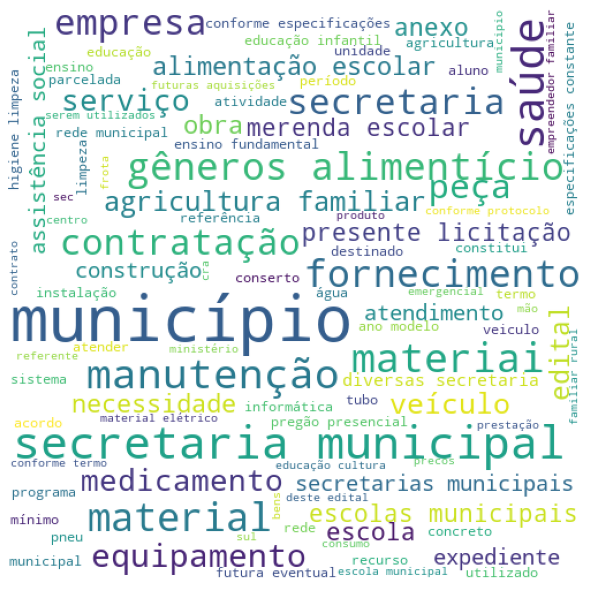

In [74]:
nuvem_palavras(licitacoes_compra.DS_OBJETO)

# Trabalhando com os dados licitante e proposta

In [9]:
licitantes=pd.read_csv('2019/licitante.csv', sep = ',', low_memory=False)
propostas=pd.read_csv('2019/proposta.csv', sep = ',', low_memory=False)

In [10]:
licitantes

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_CONDICAO,TP_RESULTADO_HABILITACAO,BL_BENEFICIO_MICRO_EPP
0,56900,19.0,2019,PRE,J,08863707000133,NaN,NaN,NaN,NaN,S
1,56900,19.0,2019,PRE,J,91824383000178,NaN,NaN,NaN,NaN,S
2,56900,19.0,2019,PRE,J,20483193000196,NaN,NaN,NaN,NaN,S
3,56900,19.0,2019,PRE,J,02441945000174,NaN,NaN,NaN,NaN,S
4,56900,19.0,2019,PRE,J,17473920000120,NaN,NaN,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
112294,44100,33.0,2019,CNV,J,07972263000101,NaN,NaN,CEP,NaN,S
112295,44100,33.0,2019,CNV,J,32022879000169,NaN,NaN,CNP,NaN,S
112296,58200,6.0,2019,TMP,J,21138178000173,NaN,NaN,NaN,H,S
112297,65700,3.0,2019,CNV,J,08547097000169,F,4.393920e+08,NCP,H,N


In [40]:
propostas

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_DOCUMENTO,NR_DOCUMENTO,DT_PROPOSTA,TP_RESULTADO_PROPOSTA,VL_TOTAL_PROPOSTA,PC_DESCONTO,VL_NOTA_TECNICA,DT_HOMOLOGACAO,PC_TX
0,56900,19.0,2019,PRE,J,08863707000133,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
1,56900,19.0,2019,PRE,J,91824383000178,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2,56900,19.0,2019,PRE,J,20483193000196,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
3,56900,19.0,2019,PRE,J,02441945000174,2019-04-24,NaN,3156.66,NaN,NaN,NaN,NaN
4,56900,19.0,2019,PRE,J,17473920000120,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112294,44100,33.0,2019,CNV,J,07972263000101,2019-11-29,NaN,6900.00,NaN,NaN,NaN,NaN
112295,44100,33.0,2019,CNV,J,32022879000169,2019-11-29,NaN,NaN,NaN,NaN,NaN,NaN
112296,58200,6.0,2019,TMP,J,21138178000173,2019-12-05,NaN,NaN,NaN,NaN,NaN,NaN
112297,65700,3.0,2019,CNV,J,08547097000169,2019-12-02,C,46439.41,0.0,0.0,NaN,NaN


# Esses dados tem relacionamento 1:1 e as colunas abaixo, são iguais em ambos os dados, então eu posso juntar esses 2 dados em um só

In [10]:
licitante_propostas = pd.merge(licitantes, propostas, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'TP_DOCUMENTO', 'NR_DOCUMENTO'])

In [48]:
licitante_propostas

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_CONDICAO,TP_RESULTADO_HABILITACAO,BL_BENEFICIO_MICRO_EPP,DT_PROPOSTA,TP_RESULTADO_PROPOSTA,VL_TOTAL_PROPOSTA,PC_DESCONTO,VL_NOTA_TECNICA,DT_HOMOLOGACAO,PC_TX
0,56900,19.0,2019,PRE,J,08863707000133,NaN,NaN,NaN,NaN,S,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
1,56900,19.0,2019,PRE,J,91824383000178,NaN,NaN,NaN,NaN,S,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2,56900,19.0,2019,PRE,J,20483193000196,NaN,NaN,NaN,NaN,S,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
3,56900,19.0,2019,PRE,J,02441945000174,NaN,NaN,NaN,NaN,S,2019-04-24,NaN,3156.66,NaN,NaN,NaN,NaN
4,56900,19.0,2019,PRE,J,17473920000120,NaN,NaN,NaN,NaN,S,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112294,44100,33.0,2019,CNV,J,07972263000101,NaN,NaN,CEP,NaN,S,2019-11-29,NaN,6900.00,NaN,NaN,NaN,NaN
112295,44100,33.0,2019,CNV,J,32022879000169,NaN,NaN,CNP,NaN,S,2019-11-29,NaN,NaN,NaN,NaN,NaN,NaN
112296,58200,6.0,2019,TMP,J,21138178000173,NaN,NaN,NaN,H,S,2019-12-05,NaN,NaN,NaN,NaN,NaN,NaN
112297,65700,3.0,2019,CNV,J,08547097000169,F,4.393920e+08,NCP,H,N,2019-12-02,C,46439.41,0.0,0.0,NaN,NaN


# Checando valores faltantes

In [49]:
print("Missing values: ", licitante_propostas.isnull().sum())

Missing values:  CD_ORGAO                         0
NR_LICITACAO                     0
ANO_LICITACAO                    0
CD_TIPO_MODALIDADE               0
TP_DOCUMENTO                     0
NR_DOCUMENTO                     0
TP_DOCUMENTO.1               58704
NR_DOCUMENTO.1               58704
TP_CONDICAO                  98346
TP_RESULTADO_HABILITACAO    100669
BL_BENEFICIO_MICRO_EPP        3876
DT_PROPOSTA                      0
TP_RESULTADO_PROPOSTA        91033
VL_TOTAL_PROPOSTA            22299
PC_DESCONTO                  79856
VL_NOTA_TECNICA              86199
DT_HOMOLOGACAO               96146
PC_TX                       112140
dtype: int64


# Checando valores duplicados

In [50]:
print("Duplicated values: ", licitante_propostas.duplicated().sum())

Duplicated values:  0


# Observando as estatísticas das colunas que são valores numéricos

In [59]:
licitante_propostas.describe()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,NR_DOCUMENTO.1,VL_TOTAL_PROPOSTA,PC_DESCONTO,VL_NOTA_TECNICA,PC_TX
count,112299.000000,1.122990e+05,112299.0,5.359500e+04,9.000000e+04,32443.000000,26100.000000,159.000000
mean,58116.896589,1.701001e+08,2019.0,3.847777e+10,1.150992e+07,0.022481,0.206151,1.461321
std,20954.569165,5.699614e+10,0.0,3.418770e+10,3.300071e+09,1.218889,10.053002,4.517493
min,100.000000,1.000000e+00,2019.0,0.000000e+00,-2.129400e+05,0.000000,0.000000,-13.350000
25%,48100.000000,6.000000e+00,2019.0,2.596294e+09,7.964460e+03,0.000000,0.000000,0.000000
50%,57500.000000,2.000000e+01,2019.0,3.486151e+10,3.270000e+04,0.000000,0.000000,0.000000
75%,72700.000000,6.000000e+01,2019.0,6.799556e+10,1.264891e+05,0.000000,0.000000,2.675000
max,88394.000000,1.910000e+13,2019.0,9.999562e+10,9.900000e+11,120.000000,1523.540000,27.500000


# Remover as linhas que têm dados faltantes em VL_TOTAL_PROPOSTA

In [11]:
licitante_propostas_nova = licitante_propostas.dropna(subset=['VL_TOTAL_PROPOSTA'])

# Checando os valores faltantes no novo dataframe

In [108]:
print("Missing values: ", licitante_propostas_nova.isnull().sum())

Missing values:  CD_ORGAO                        0
NR_LICITACAO                    0
ANO_LICITACAO                   0
CD_TIPO_MODALIDADE              0
TP_DOCUMENTO                    0
NR_DOCUMENTO                    0
TP_DOCUMENTO.1              43236
NR_DOCUMENTO.1              43236
TP_CONDICAO                 78991
TP_RESULTADO_HABILITACAO    80650
BL_BENEFICIO_MICRO_EPP       3376
DT_PROPOSTA                     0
TP_RESULTADO_PROPOSTA       68874
VL_TOTAL_PROPOSTA               0
PC_DESCONTO                 57674
VL_NOTA_TECNICA             64007
DT_HOMOLOGACAO              73900
PC_TX                       89865
dtype: int64


# Criando um novo dataframe com as colunas mais importantes e com poucos dados faltantes

In [14]:
licitacoes_vencedoras = licitante_propostas_nova.loc[:,['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA']]

# Criando um dataframe apenas com as licitação que têm o resultado da posposta (vencedora, perdedora ou pendente)

In [15]:
licitacoes_vencedoras = licitacoes_vencedoras.dropna(subset=['TP_RESULTADO_PROPOSTA'])

# Escolhendo apenas as licitações classificadas como vencedoras

In [16]:
licitacoes_vencedoras = licitacoes_vencedoras[licitacoes_vencedoras['TP_RESULTADO_PROPOSTA'] == 'C']

In [37]:
licitacoes_vencedoras

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
13,45003,7.0,2019,CNC,08146857000126,2019-11-18,1026899.77,C
24,300,3.0,2019,PRE,94188638000141,2019-01-09,100000.00,C
25,300,3.0,2019,PRE,30170357000189,2019-01-09,70000.00,C
51,71000,4.0,2019,TMP,11452103000109,2019-05-17,38204.67,C
59,8700,6.0,2019,EST,08533925000100,2019-05-14,3263356.68,C
...,...,...,...,...,...,...,...,...
112227,63300,4.0,2019,CNV,30739340000108,2019-11-21,116701.40,C
112228,63300,4.0,2019,CNV,35070266000195,2019-11-21,113984.11,C
112246,49500,83.0,2019,PRP,93088649000197,2019-11-28,66900.01,C
112284,76600,34.0,2019,PRP,09310477000148,2019-12-03,206608.00,C


# Juntando as licitações com licitantes e propostas

In [17]:
licitacoes_licitante_proposta = pd.merge(licitacoes_compra, licitacoes_vencedoras, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'])

In [63]:
licitacoes_licitante_proposta

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,79.0,2019,PRP,21788,2019,COM,ADH,MPR,Aquisição de 78.000 (setenta e oito mil) quilo...,406120.0,87822110000117,2019-10-31,139230.0,C
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2019,PRP,2532,2019,COM,ADH,MPR,Aquisição de 3.700 kg de polímero não iônico a...,92056.0,87822110000117,2019-02-20,74000.0,C
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,7.0,2019,PRP,1847,2019,COM,ADH,MPR,Aquisição de 65 t (sessenta e cindo toneladas)...,533000.0,87822110000117,2019-02-11,461500.0,C
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,38.0,2019,PRP,9796,2019,COM,ADH,MPR,Aquisição de 40.500 (quarenta mil e quinhentos...,359032.5,87822110000117,2019-05-29,218295.0,C
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,68.0,2019,PRP,19536,2019,COM,ADH,MPR,Aquisição de Larvicida biológico BTI (Bacillus...,443133.2,68833227000151,2019-09-26,395600.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,06161649000170,2019-05-13,30520.0,C
3889,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,90355561000104,2019-05-13,27900.0,C
3890,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,13745092000180,2019-05-13,43780.0,C
3891,78200,PM DE NOVA SANTA RITA,2.0,2019,PRE,1590,2019,COM,HAP,MPR,Aquisição de Gás Medicinal Oxigênio com fornec...,60150.0,00331788003304,2019-03-15,60150.0,C


In [64]:
print("Missing values: ", licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO              0
ANO_PROCESSO             0
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO                0
VL_LICITACAO             0
NR_DOCUMENTO             0
DT_PROPOSTA              0
VL_TOTAL_PROPOSTA        0
TP_RESULTADO_PROPOSTA    0
dtype: int64


# Somando todos os valores de propostas das licitações vencedoras de acordo com os nome dos orgãos, a fim de saber qual orgão pediu e recebeu mais dinheiro nas propostas do ano

In [18]:
licitacoes_vencedoras_soma = pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_TOTAL_PROPOSTA']).sort_values(by=['VL_TOTAL_PROPOSTA'], ascending=False)

In [66]:
licitacoes_vencedoras_soma

,VL_TOTAL_PROPOSTA
NM_ORGAO,
PM DE PORTO ALEGRE,8.118508e+08
DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE,2.057889e+08
PM DE RIO GRANDE,6.255285e+07
CONS. PÚBL. DO EXTREMO SUL,4.194000e+07
PM DE MAÇAMBARÁ,2.061389e+07
...,...
PM DE MAQUINÉ,5.765000e+03
CM DE BALNEÁRIO PINHAL,2.112150e+03
PM DE CHUÍ,1.508400e+03


In [67]:
pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_LICITACAO']).sort_values(by=['VL_LICITACAO'], ascending=False)

,VL_LICITACAO
NM_ORGAO,
PM DE PORTO ALEGRE,4.906238e+08
PM DE BALNEÁRIO PINHAL,3.143124e+08
PM DE MAÇAMBARÁ,2.404359e+08
DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE,1.270535e+08
PM DE FREDERICO WESTPHALEN,7.196955e+07
...,...
PM DE CAMPINAS DO SUL,1.320000e+03
PM DE DOUTOR MAURÍCIO CARDOSO,8.963100e+02
PM DE BOM RETIRO DO SUL,0.000000e+00


# Fazendo a nuvem de palavras para saber quais as descrições de objetos que mais ganharam dinheiro de licitações

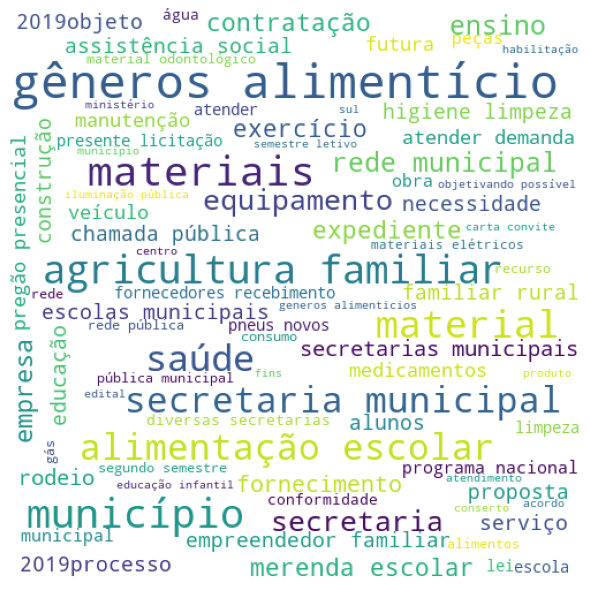

In [77]:
nuvem_palavras(licitacoes_licitante_proposta.DS_OBJETO)

# Carregando o arquivo de itens

In [19]:
itens=pd.read_csv('2019/item.csv', sep = ',', low_memory=False)

# Checando as colunas de itens para saber quais estão em comum com o dataframe de licitações, licitantes e propostas

In [81]:
print(itens.columns.values)

['CD_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE' 'NR_LOTE'
 'NR_ITEM' 'NR_ITEM_ORIGINAL' 'DS_ITEM' 'QT_ITENS' 'SG_UNIDADE_MEDIDA'
 'VL_UNITARIO_ESTIMADO' 'VL_TOTAL_ESTIMADO' 'DT_REF_VALOR_ESTIMADO'
 'PC_BDI_ESTIMADO' 'PC_ENCARGOS_SOCIAIS_ESTIMADO' 'CD_FONTE_REFERENCIA'
 'DS_FONTE_REFERENCIA' 'TP_RESULTADO_ITEM' 'VL_UNITARIO_HOMOLOGADO'
 'VL_TOTAL_HOMOLOGADO' 'PC_BDI_HOMOLOGADO'
 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO' 'TP_ORCAMENTO' 'CD_TIPO_FAMILIA'
 'CD_TIPO_SUBFAMILIA' 'TP_DOCUMENTO' 'NR_DOCUMENTO' 'TP_DOCUMENTO.1'
 'NR_DOCUMENTO.1' 'TP_BENEFICIO_MICRO_EPP' 'PC_TX_ESTIMADA'
 'PC_TX_HOMOLOGADA']


# Juntando os dataframes de acordo com as colunas que estão em comum entre os dataframes

In [20]:
itens_licitacoes_licitante_proposta = pd.merge(licitacoes_licitante_proposta, itens, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO'])

In [86]:
itens_licitacoes_licitante_proposta

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,79.0,2019,PRP,21788,2019,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2019,PRP,2532,2019,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,7.0,2019,PRP,1847,2019,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,38.0,2019,PRP,9796,2019,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,68.0,2019,PRP,19536,2019,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20904,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,T,NaN,NaN
20905,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,T,NaN,NaN
20906,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,T,NaN,NaN
20907,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,T,NaN,NaN


# Checando os valores faltantes

In [87]:
print("Missing values: ", itens_licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                              0
NM_ORGAO                              0
NR_LICITACAO                          0
ANO_LICITACAO                         0
CD_TIPO_MODALIDADE                    0
NR_PROCESSO                           0
ANO_PROCESSO                          0
TP_OBJETO                             0
CD_TIPO_FASE_ATUAL                    0
TP_LICITACAO                          0
DS_OBJETO                             0
VL_LICITACAO                          0
NR_DOCUMENTO                          0
DT_PROPOSTA                           0
VL_TOTAL_PROPOSTA                     0
TP_RESULTADO_PROPOSTA                 0
NR_LOTE                               0
NR_ITEM                               0
NR_ITEM_ORIGINAL                      0
DS_ITEM                               0
QT_ITENS                              0
SG_UNIDADE_MEDIDA                     0
VL_UNITARIO_ESTIMADO                426
VL_TOTAL_ESTIMADO                   426
DT_REF_VALOR_ESTIMADO  

# Criando o novo dataframde com as colunas que não tem dados faltantes + as colunas de valores homologados

In [21]:
item = itens_licitacoes_licitante_proposta.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA', 'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS', 'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO', 'TP_DOCUMENTO']]

# Removendo as linhas que não possuem os valores homologados

In [22]:
item = item.dropna(subset=['VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO'])

In [92]:
item

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,79.0,2019,PRP,21788,2019,COM,ADH,MPR,...,C,1,1,1,Aquisição de 78.000 (setenta e oito mil) quilo...,78000.00,KG,1.785,139230.0,J
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2019,PRP,2532,2019,COM,ADH,MPR,...,C,1,1,1,"Polímero não-iônico, com aparência pó branco; ...",3700.00,KG,20.000,74000.0,J
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,7.0,2019,PRP,1847,2019,COM,ADH,MPR,...,C,1,1,1,Aquisição de 65 t (sessenta e cindo toneladas)...,65.00,T,7100.000,461500.0,J
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,38.0,2019,PRP,9796,2019,COM,ADH,MPR,...,C,1,1,1,"Ortopolifosfato líquido, concentração de 50 a ...",40500.00,KG,5.390,218295.0,J
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,68.0,2019,PRP,19536,2019,COM,ADH,MPR,...,C,1,1,1,Aquisição de Larvicida biológico BTI (Bacillus...,4000.00,UN,98.900,395600.0,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20904,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,C,1,2,2,Lavador de mandioca (01 confeccionado em aço i...,2.00,UN,15260.000,30520.0,J
20905,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,C,1,4,4,"Câmara Fria - com PLUG-IN 220V Monofásico, Sis...",1.00,UN,27900.000,27900.0,J
20906,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,C,1,5,5,"Balança eletromecânica, , com indicador de pes...",1.00,UN,3930.000,3930.0,J
20907,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,...,C,1,3,3,"Equipamento para embalar a vácuo, Painel digit...",1.00,UN,14880.000,14880.0,J


In [93]:
print("Missing values: ", item.isnull().sum())

Missing values:  CD_ORGAO                  0
NM_ORGAO                  0
NR_LICITACAO              0
ANO_LICITACAO             0
CD_TIPO_MODALIDADE        0
NR_PROCESSO               0
ANO_PROCESSO              0
TP_OBJETO                 0
CD_TIPO_FASE_ATUAL        0
TP_LICITACAO              0
DS_OBJETO                 0
VL_LICITACAO              0
NR_DOCUMENTO              0
DT_PROPOSTA               0
VL_TOTAL_PROPOSTA         0
TP_RESULTADO_PROPOSTA     0
NR_LOTE                   0
NR_ITEM                   0
NR_ITEM_ORIGINAL          0
DS_ITEM                   0
QT_ITENS                  0
SG_UNIDADE_MEDIDA         0
VL_UNITARIO_HOMOLOGADO    0
VL_TOTAL_HOMOLOGADO       0
TP_DOCUMENTO              0
dtype: int64


In [ ]:
item.to_csv('2019/)

# Observando a estatistica das colunas numéricas do novo dataframe

In [94]:
item.describe()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,ANO_PROCESSO,VL_LICITACAO,VL_TOTAL_PROPOSTA,NR_LOTE,NR_ITEM,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO
count,20849.000000,20849.000000,20849.0,20849.0,2.084900e+04,2.084900e+04,20849.000000,20849.000000,2.084900e+04,2.084900e+04
mean,61446.682143,2209.953379,2019.0,2019.0,4.340010e+05,1.725126e+05,1.799799,3672.240443,2.635515e+03,1.622344e+04
std,16525.137851,37626.232968,0.0,0.0,3.162073e+06,1.419810e+06,6.925629,29122.256735,4.112058e+04,1.978750e+05
min,900.000000,1.000000,2019.0,2019.0,0.000000e+00,7.720000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00
25%,48400.000000,4.000000,2019.0,2019.0,1.825045e+04,1.133375e+04,1.000000,9.000000,2.940000e+00,1.479000e+02
50%,59800.000000,11.000000,2019.0,2019.0,6.421840e+04,3.057200e+04,1.000000,29.000000,8.790000e+00,5.817000e+02
75%,73900.000000,29.000000,2019.0,2019.0,2.458087e+05,9.139060e+04,1.000000,67.000000,4.000000e+01,2.565000e+03
max,88394.000000,731002.000000,2019.0,2019.0,3.138240e+08,4.194000e+07,110.000000,291113.000000,3.000000e+06,1.364000e+07


# Testando se a nuvem de palavras apresenta palavras que fazem sentido no contexto, a fim de obter informações sobre os itens comprados

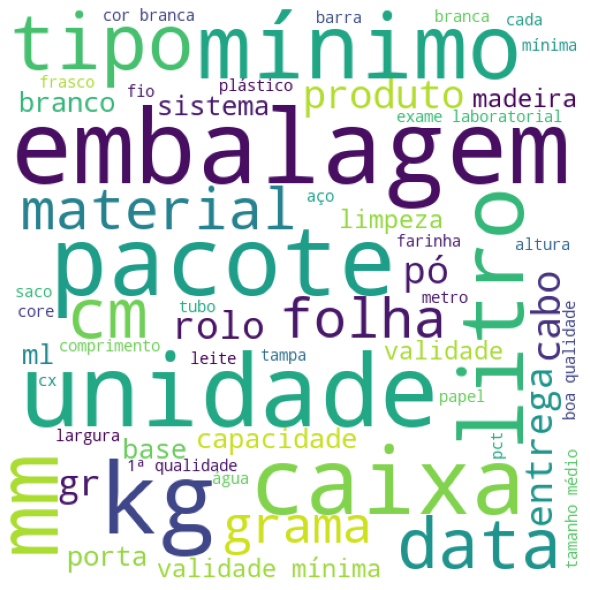

In [95]:
nuvem_palavras(item.DS_ITEM)

### Como pôde ser visto na nuvem, algumas palavras fazem sentido, mas existem outras que devem ser usadas como stop words e não devem ser levadas em consideração, como por exemplo, kg, gr, mm, largura, grama, etc. Portanto, irei testar outro caminho que seria através da frequência das palavras que mais aparecem.

In [96]:
item.DS_ITEM

0        Aquisição de 78.000 (setenta e oito mil) quilo...
1        Polímero não-iônico, com aparência pó branco; ...
2        Aquisição de 65 t (sessenta e cindo toneladas)...
3        Ortopolifosfato líquido, concentração de 50 a ...
4        Aquisição de Larvicida biológico BTI (Bacillus...
                               ...                        
20904    Lavador de mandioca (01 confeccionado em aço i...
20905    Câmara Fria - com PLUG-IN 220V Monofásico, Sis...
20906    Balança eletromecânica, , com indicador de pes...
20907    Equipamento para embalar a vácuo, Painel digit...
20908    Descascador de mandioca, com capacidade de pro...
Name: DS_ITEM, Length: 20849, dtype: object

# convertendo todas as palavras em minúsculas para que uma mesma palavra não seja contabilizada em 2 chaves de dicionário distintas

In [22]:
minusculas = item["DS_ITEM"].to_string().lower()

In [39]:
minusculas

'0        aquisição de 78.000 (setenta e oito mil) quilo...\n1        polímero não-iônico, com aparência pó branco; ...\n2        aquisição de 65 t (sessenta e cindo toneladas)...\n3        ortopolifosfato líquido, concentração de 50 a ...\n4        aquisição de larvicida biológico bti (bacillus...\n5        larvicida biológico bti (bacillus thuringiensi...\n6        mini porta pallet industrial aberto; em aço; c...\n7        bancada desmontável para ferramentas; dimensõe...\n8        armário distribuidor com oito portas; em aço; ...\n9        armário de aço; chapa 24; dimensões aproximada...\n10       pressostato selado para cloro com as seguintes...\n11       caixa de ignição completa, para queimador de b...\n12       presilha de fixação das velas, para queimador ...\n13       velas de ignição, para queimador de biogás lgm...\n14       carvão antracito, tamanho efetivo de 0,9mm, co...\n15       areia filtrante – classificação tamanho efetiv...\n16       carvão ativado em pó.  obs.: u

# Splitando a string e armazenando em uma lista de palavras

In [23]:
lista = minusculas.split()

In [42]:
lista

['0',
 'aquisição',
 'de',
 '78.000',
 '(setenta',
 'e',
 'oito',
 'mil)',
 'quilo...',
 '1',
 'polímero',
 'não-iônico,',
 'com',
 'aparência',
 'pó',
 'branco;',
 '...',
 '2',
 'aquisição',
 'de',
 '65',
 't',
 '(sessenta',
 'e',
 'cindo',
 'toneladas)...',
 '3',
 'ortopolifosfato',
 'líquido,',
 'concentração',
 'de',
 '50',
 'a',
 '...',
 '4',
 'aquisição',
 'de',
 'larvicida',
 'biológico',
 'bti',
 '(bacillus...',
 '5',
 'larvicida',
 'biológico',
 'bti',
 '(bacillus',
 'thuringiensi...',
 '6',
 'mini',
 'porta',
 'pallet',
 'industrial',
 'aberto;',
 'em',
 'aço;',
 'c...',
 '7',
 'bancada',
 'desmontável',
 'para',
 'ferramentas;',
 'dimensõe...',
 '8',
 'armário',
 'distribuidor',
 'com',
 'oito',
 'portas;',
 'em',
 'aço;',
 '...',
 '9',
 'armário',
 'de',
 'aço;',
 'chapa',
 '24;',
 'dimensões',
 'aproximada...',
 '10',
 'pressostato',
 'selado',
 'para',
 'cloro',
 'com',
 'as',
 'seguintes...',
 '11',
 'caixa',
 'de',
 'ignição',
 'completa,',
 'para',
 'queimador',
 'de',

# Os índices da coluna do dataframe também entraram na string e consequentemente na lista, então aqui vou removê-los

In [24]:
novos_items = [item for item in lista if not item.isdigit()]

In [46]:
novos_items

['aquisição',
 'de',
 '78.000',
 '(setenta',
 'e',
 'oito',
 'mil)',
 'quilo...',
 'polímero',
 'não-iônico,',
 'com',
 'aparência',
 'pó',
 'branco;',
 '...',
 'aquisição',
 'de',
 't',
 '(sessenta',
 'e',
 'cindo',
 'toneladas)...',
 'ortopolifosfato',
 'líquido,',
 'concentração',
 'de',
 'a',
 '...',
 'aquisição',
 'de',
 'larvicida',
 'biológico',
 'bti',
 '(bacillus...',
 'larvicida',
 'biológico',
 'bti',
 '(bacillus',
 'thuringiensi...',
 'mini',
 'porta',
 'pallet',
 'industrial',
 'aberto;',
 'em',
 'aço;',
 'c...',
 'bancada',
 'desmontável',
 'para',
 'ferramentas;',
 'dimensõe...',
 'armário',
 'distribuidor',
 'com',
 'oito',
 'portas;',
 'em',
 'aço;',
 '...',
 'armário',
 'de',
 'aço;',
 'chapa',
 '24;',
 'dimensões',
 'aproximada...',
 'pressostato',
 'selado',
 'para',
 'cloro',
 'com',
 'as',
 'seguintes...',
 'caixa',
 'de',
 'ignição',
 'completa,',
 'para',
 'queimador',
 'de',
 'b...',
 'presilha',
 'de',
 'fixação',
 'das',
 'velas,',
 'para',
 'queimador',
 '..

# Contando a frequência de cada palavra da lista e armazenando em um dicionário onde as chaves são as palavras e os valores são as frequências

In [25]:
import collections
contagens = dict(collections.Counter(novos_items))

In [48]:
contagens

{'aquisição': 143,
 'de': 8954,
 '78.000': 1,
 '(setenta': 1,
 'e': 885,
 'oito': 3,
 'mil)': 1,
 'quilo...': 1,
 'polímero': 1,
 'não-iônico,': 1,
 'com': 2884,
 'aparência': 1,
 'pó': 273,
 'branco;': 1,
 '...': 1588,
 't': 15,
 '(sessenta': 2,
 'cindo': 1,
 'toneladas)...': 1,
 'ortopolifosfato': 1,
 'líquido,': 20,
 'concentração': 3,
 'a': 439,
 'larvicida': 4,
 'biológico': 24,
 'bti': 2,
 '(bacillus...': 1,
 '(bacillus': 1,
 'thuringiensi...': 1,
 'mini': 20,
 'porta': 77,
 'pallet': 1,
 'industrial': 19,
 'aberto;': 1,
 'em': 1320,
 'aço;': 4,
 'c...': 228,
 'bancada': 5,
 'desmontável': 2,
 'para': 1918,
 'ferramentas;': 1,
 'dimensõe...': 2,
 'armário': 47,
 'distribuidor': 2,
 'portas;': 1,
 'chapa': 25,
 '24;': 1,
 'dimensões': 10,
 'aproximada...': 2,
 'pressostato': 1,
 'selado': 1,
 'cloro': 19,
 'as': 26,
 'seguintes...': 2,
 'caixa': 374,
 'ignição': 1,
 'completa,': 4,
 'queimador': 3,
 'b...': 39,
 'presilha': 2,
 'fixação': 14,
 'das': 12,
 'velas,': 1,
 'velas': 2,

# Ordenando o dicionário do maior para o menor para uma melhor visualização

In [26]:
contagens_ordenadas = dict(sorted(contagens.items(), key=lambda x: x[1], reverse=True))

In [50]:
contagens_ordenadas

{'de': 8954,
 'com': 2884,
 'para': 1918,
 '...': 1588,
 'em': 1320,
 '-': 1247,
 'x': 900,
 'e': 885,
 'tipo': 764,
 'c/': 598,
 'embalagem': 550,
 'cor': 484,
 'tamanho': 469,
 'papel': 452,
 'a': 439,
 'mm': 424,
 'sem': 415,
 'material': 413,
 'pneu': 413,
 '¿': 410,
 'caixa': 374,
 'cm': 360,
 'nº': 340,
 'kg': 325,
 'fita': 301,
 'aço': 291,
 'ml': 275,
 'pó': 273,
 'qualidade,': 273,
 'cabo': 273,
 'pvc': 263,
 'pacote': 260,
 'do': 257,
 '100%': 250,
 'medicamentos': 249,
 'carne': 241,
 'no': 241,
 'luva': 240,
 'tinta': 238,
 'ar': 236,
 'c...': 228,
 'cola': 224,
 'leite': 218,
 'limpeza': 218,
 'na': 218,
 'gr': 217,
 'saco': 214,
 'unidades': 214,
 'branco': 212,
 'exame': 209,
 'pct': 208,
 'laboratorial': 206,
 'filtro': 205,
 'litros': 201,
 '1ª': 200,
 'óleo': 195,
 'cx': 190,
 'doce': 189,
 'tecido': 185,
 'rolo': 183,
 'biscoito': 179,
 'farinha': 178,
 'cores': 177,
 'da': 174,
 'tubo': 172,
 'p/': 170,
 'm': 165,
 'expediente': 165,
 'pão': 164,
 'milho': 161,
 'ma

# Criando a lista de palavras que não deve ser contabilizada

In [27]:
# Lista de palavras que não serão contabilizadas
novas_stopwords = ["de", "da", "do", "para", "dos", "das", "cor", "...", "tamanho",
                     "em", "aquisição", "por", "preço", "registro", "mm", "cm",
                     "preços", "um", "através", "na", "no", "ou", "a", "kg", "ml",
                     "compra", "aquisicao", "uso", "com", "x", "e", "-", "¿", "qualidade,",
                      "nº","processo", "objeto", "p/", "c/", "100%", "tipo", "sem"]

# Removendo as stop words do dicionário

In [28]:
for chave in novas_stopwords:
    contagens_ordenadas.pop(chave)

In [61]:
contagens_ordenadas

{'embalagem': 550,
 'papel': 452,
 'material': 413,
 'pneu': 413,
 'caixa': 374,
 'fita': 301,
 'aço': 291,
 'pó': 273,
 'cabo': 273,
 'pvc': 263,
 'pacote': 260,
 'medicamentos': 249,
 'carne': 241,
 'luva': 240,
 'tinta': 238,
 'ar': 236,
 'c...': 228,
 'cola': 224,
 'leite': 218,
 'limpeza': 218,
 'gr': 217,
 'saco': 214,
 'unidades': 214,
 'branco': 212,
 'exame': 209,
 'pct': 208,
 'laboratorial': 206,
 'filtro': 205,
 'litros': 201,
 '1ª': 200,
 'óleo': 195,
 'cx': 190,
 'doce': 189,
 'tecido': 185,
 'rolo': 183,
 'biscoito': 179,
 'farinha': 178,
 'cores': 177,
 'tubo': 172,
 'm': 165,
 'expediente': 165,
 'pão': 164,
 'milho': 161,
 'massa': 161,
 'branca': 160,
 'mínimo': 159,
 '+': 156,
 'plástico': 155,
 'in': 155,
 'pasta': 154,
 'lixo': 151,
 'grande': 150,
 'concreto': 148,
 'folha': 143,
 'capacidade': 142,
 'madeira': 141,
 'd...': 139,
 'pincel': 137,
 'cloridrato': 134,
 'de...': 133,
 'agulha': 133,
 'kit': 130,
 'frasco': 130,
 'novo': 129,
 'não': 127,
 'fio': 126,

# Selecionando as 15 palavras com mais frequência para fazer um gráfico de barras

In [29]:
import itertools
itens_despesas = dict(itertools.islice(contagens_ordenadas.items(), 0, 15))

In [63]:
itens_despesas

{'embalagem': 550,
 'papel': 452,
 'material': 413,
 'pneu': 413,
 'caixa': 374,
 'fita': 301,
 'aço': 291,
 'pó': 273,
 'cabo': 273,
 'pvc': 263,
 'pacote': 260,
 'medicamentos': 249,
 'carne': 241,
 'luva': 240,
 'tinta': 238}

# Gráfico de barras com as palavras que aparecem com mais frequência na descrição dos itens, assim podemos saber os itens que estão relacionados com os maiores gastos

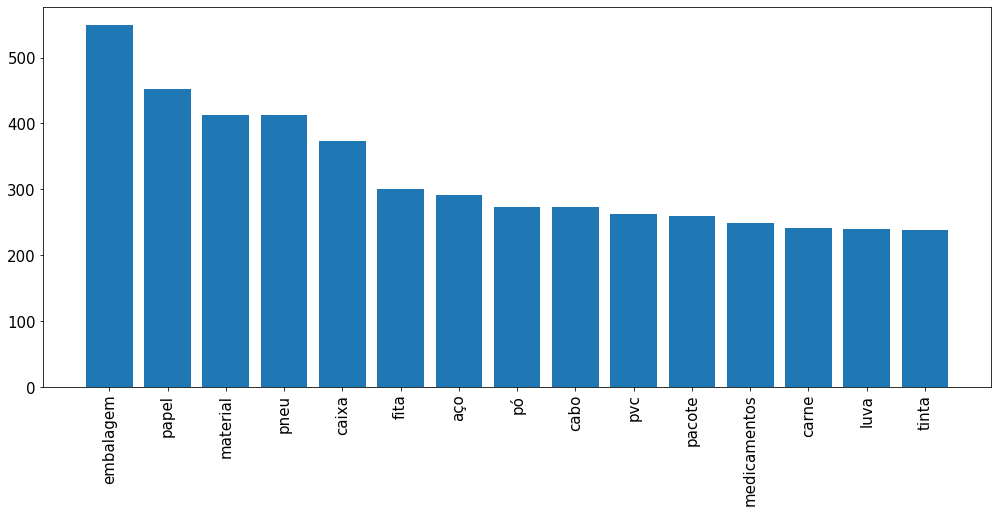

In [57]:
keys = itens_despesas.keys()
values = itens_despesas.values()
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(17,7))
plt.bar(keys, values)
plt.xticks(range(15), rotation='vertical')
plt.show()

# Usando a Lei de Benford para estudar as amostras do mesmo tipo, buscando encontrar dados inconsistêntes, errôneos ou até mesmo fraudes

In [32]:
!pip3 install benford_py

  Created wheel for benford-py: filename=benford_py-0.2.7-py3-none-any.whl size=24789 sha256=79ee412e021a2542839b72d95821441971330c814553ec4f2e2bf18566f1ead7
  Stored in directory: /home/thais/.cache/pip/wheels/af/ec/0c/d9bfd4f0d6899acd3a749a9a67217104015d65e7c5da1ac6a4
Successfully built benford-py


In [30]:
import benford as bf

# Fazendo o estudo relacionado aos valores homologados dos itens

In [31]:
item_bf = item.VL_TOTAL_HOMOLOGADO

### Aqui estou levando em consideração os primeiros 2 dígitos (10 - 99). Os dígitos em amarelo são os dígitos considerados inconsistentes, ou seja, esse dígitos acharam inconsistência nos dados


Initialized sequence with 20759 registries.
First_2_Dig
10    0.041331
11    0.035936
12    0.032853
13    0.030011
14    0.033865
        ...   
95    0.005877
96    0.004625
97    0.004528
98    0.004625
99    0.006166
Name: Found, Length: 90, dtype: float64

Test performed on 20759 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
60           0.007179  0.011658  7.603062
90           0.004799  0.008430  7.520333
70           0.006160  0.008767  4.756081
39           0.010995  0.014355  4.608846
59           0.007299  0.009827  4.237836
24           0.017729  0.021485  4.074432
50           0.008600  0.011176  3.981446
75           0.005752  0.007852  3.954376
99           0.004365  0.006166  3.884049
19           0.022276  0.025965  3.577233
14           0.029963  0.033865  3.276943
89           0.004853  0.006311  2.973060
80       

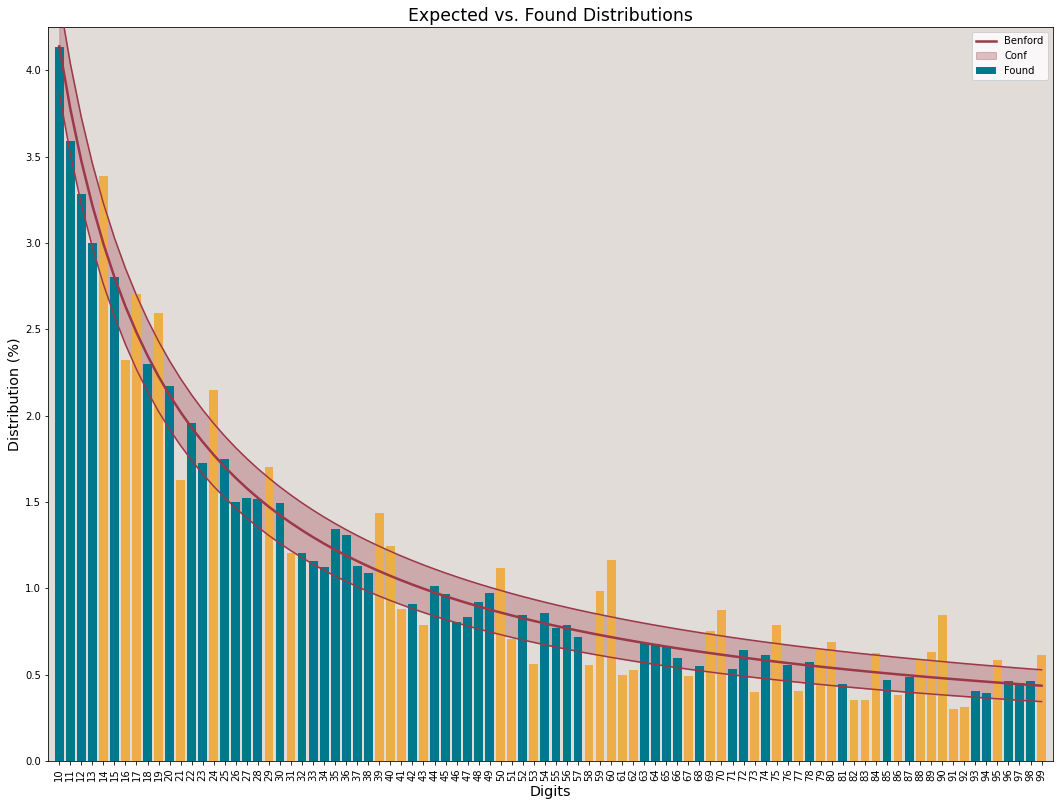

In [32]:
f2d = bf.first_digits(item_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (60, 90 e 70)

In [45]:
itens_digitos = item

# Convertendo a coluna de float para string

In [46]:
itens_digitos['VL_TOTAL_HOMOLOGADO'] = itens_digitos['VL_TOTAL_HOMOLOGADO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 60, 90 ou 70

In [53]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_HOMOLOGADO'].str.startswith(('60', '90', '70'))])

In [54]:
dados_incosistentes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
27,42600,PM DE BRAGA,35.0,2019,PRP,66,2019,COM,ADH,MPR,...,C,1,1,19926,KIT DE MADEIRA PARA CONSTRUÇÃO DE CASA Cada ki...,15.00,UN,4692.0,70380.0,J
33,40100,PM DE AGUDO,11.0,2019,PRP,728,2019,COM,ADH,MPR,...,C,2,1,1,Transporte de calcário a granel,1200.00,UN,75.0,90000.0,J
103,62700,PM DE VERA CRUZ,34.0,2019,PRP,46,2019,COM,ADH,MPR,...,C,1,3,3,219000495 Retentor,2.00,UN,45.0,90.0,J
166,88261,FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO,5.0,2019,PRP,190,2019,COM,ADH,MPR,...,C,1,15,15,RETOSIGMÓIDOSCOPIA,10.00,UN,60.0,600.0,J
182,52400,PM DE MOSTARDAS,13.0,2019,PRP,144,2019,COM,ADH,MPR,...,C,1,7,7,BATERIA 100 A,1.00,UN,700.0,700.0,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20731,55900,PM DE RODEIO BONITO,7.0,2019,CNV,35,2019,COM,ADH,MPR,...,C,1,95,95,ESPONJA POROSA PACOTES COM 2 UNI.,20.00,PAC,3.5,70.0,J
20788,55900,PM DE RODEIO BONITO,7.0,2019,CNV,35,2019,COM,ADH,MPR,...,C,1,92,92,ISOPOR PORTA GARRAFA TÉRMICO 600 ML,100.00,UN,7.0,700.0,J
20838,48400,PM DE FREDERICO WESTPHALEN,45.0,2019,PRP,80,2019,COM,ADH,MPR,...,C,1,8,8,"NOBREAK de 700 VA entrada 220v e saída 110v, c...",3.00,UN,300.0,900.0,J
20851,69900,PM DE PINHAL,8.0,2019,PRP,81,2019,COM,ADH,MPR,...,C,1,14,14,MESA PEBOLIM,1.00,UN,900.0,900.0,J


# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_HOMOLOGADO

In [58]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE MAÇAMBARÁ                                         94
PM DE FREDERICO WESTPHALEN                              83
PM DE ALPESTRE                                          40
PM DE MORRO REUTER                                      28
PM DE SÃO VICENTE DO SUL                                21
                                                        ..
PM DE TAPERA                                             1
PM DE MARAU                                              1
FUND. DE SAÚDE PÚBLICA SÃO CAMILO DE ESTEIO - FSPSCE     1
BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL         1
CM DE BENTO GONÇALVES                                    1
Name: NM_ORGAO, Length: 67, dtype: int64

# Fazendo o estudo relacionado aos valores totais das propostas

In [52]:
total_proposta_bf = item.VL_TOTAL_PROPOSTA


Initialized sequence with 20849 registries.
First_2_Dig
10    0.037076
11    0.038563
12    0.048060
13    0.039666
14    0.023167
        ...   
95    0.005852
96    0.000767
97    0.003885
98    0.007914
99    0.005324
Name: Found, Length: 90, dtype: float64

Test performed on 20849 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_2_Dig                               
34           0.012589  0.031512  24.475925
78           0.005532  0.014821  18.034479
91           0.004746  0.011367  13.859282
24           0.017729  0.029786  13.166072
73           0.005909  0.012902  13.130358
79           0.005463  0.012087  12.929055
92           0.004695  0.009833  10.800892
12           0.034762  0.048060  10.463252
37           0.011582  0.019234  10.293793
29           0.014723  0.021728   8.368415
59           0.007299  0.012183   8.243218
98           0.004409  0.007914   7.58

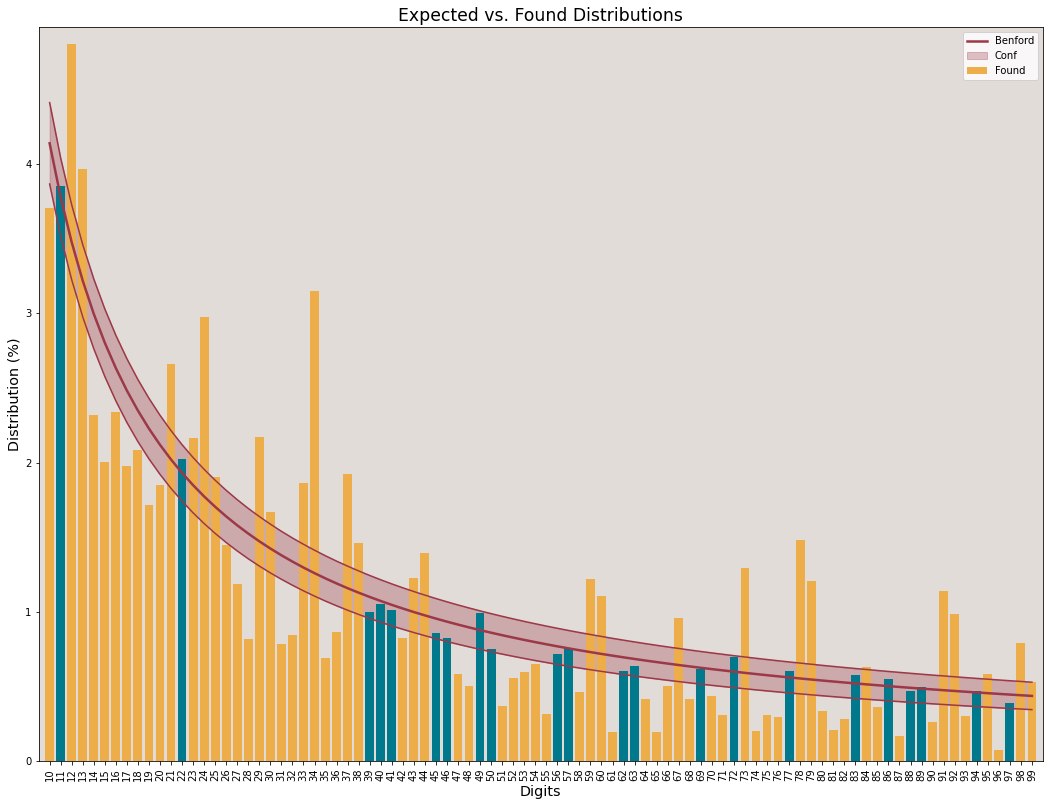

In [54]:
f2d = bf.first_digits(total_proposta_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (34, 78 e 91)

In [59]:
itens_digitos = item

# Convertendo a coluna de float para string

In [60]:
itens_digitos['VL_TOTAL_PROPOSTA'] = itens_digitos['VL_TOTAL_PROPOSTA'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 34, 78 ou 91

In [61]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_PROPOSTA'].str.startswith(('34', '78', '91'))])

In [62]:
dados_incosistentes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
829,43500,PM DE CAMAQUÃ,9.0,2019,CNV,1467,2019,COM,ADH,MPR,...,C,1,1,1,CONJUNTO PEÇAS PRÉ MOLDADAS CONCRETO P/GAVETÁRIO,40.00,CJ,853.2795,34131.18,J
898,43000,PM DE CACHOEIRA DO SUL,31.0,2019,PRP,7379,2019,COM,ADH,MPR,...,C,1,1,1,REVISTAS IMPRESSAS - CADERNOS DE CHAMADA 2 ANO...,30.00,UN,12.1400,364.2,J
899,43000,PM DE CACHOEIRA DO SUL,31.0,2019,PRP,7379,2019,COM,ADH,MPR,...,C,1,2,2,REVISTAS IMPRESSAS - CADERNOS DE CHAMADA 2 ANO...,416.00,UN,5.9800,2487.68,J
900,43000,PM DE CACHOEIRA DO SUL,31.0,2019,PRP,7379,2019,COM,ADH,MPR,...,C,1,3,3,REVISTAS IMPRESSAS - CADERNOS DE CHAMADA 2 ANO...,416.00,UN,5.9800,2487.68,J
901,43000,PM DE CACHOEIRA DO SUL,31.0,2019,PRP,7379,2019,COM,ADH,MPR,...,C,1,4,4,REVISTAS IMPRESSAS - CADERNOS DE CHAMADA 2 ANO...,416.00,UN,5.9800,2487.68,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20856,69900,PM DE PINHAL,8.0,2019,PRP,81,2019,COM,ADH,MPR,...,C,1,6,6,SÓLIDOS GEOMETRICOS,5.00,UN,64.0000,320.0,J
20857,69900,PM DE PINHAL,8.0,2019,PRP,81,2019,COM,ADH,MPR,...,C,1,4,4,ESCALA CURSINAIRE,5.00,UN,75.0000,375.0,J
20858,69900,PM DE PINHAL,8.0,2019,PRP,81,2019,COM,ADH,MPR,...,C,1,3,3,TANGRAN EM MDF 70 PEÇAS,5.00,UN,62.0000,310.0,J
20879,48400,PM DE FREDERICO WESTPHALEN,39.0,2019,PRP,69,2019,COM,ADH,MPR,...,C,1,12,12,Cones de sinalização em plástico com 2 faixas ...,70.00,UN,104.2700,7298.9,J


# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_PROPOSTA

In [63]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                           291
PM DE PAULO BENTO                                    206
PM DE ALPESTRE                                       152
PM DE ARROIO DO TIGRE                                 81
PM DE ERNESTINA                                       63
PM DE IRAÍ                                            58
PM DE PLANALTO                                        52
PM DE PINHAL                                          48
PM DE FORTALEZA DOS VALOS                             38
CONS. INTERM. ABRIGO INSTITUCIONAL DA PAZ - CIAIP     33
PM DE TIO HUGO                                        31
PM DE MORMAÇO                                         25
PM DE CACHOEIRA DO SUL                                24
PM DE VISTA GAÚCHA                                    19
PM DE RIO GRANDE                                      19
PM DE MORRO REUTER                                    19
PM DE ARARICÁ                                          9
DEP. MUNICIPAL DE ÁGUA E ESGOTO

# Fazendo o estudo relacionado aos valores de licitação

In [64]:
vl_licitacao_bf = item.VL_LICITACAO


Initialized sequence with 17779 registries.
First_2_Dig
10    0.025986
11    0.043085
12    0.055796
13    0.021599
14    0.022723
        ...   
95    0.003656
96    0.001912
97    0.002362
98    0.010968
99    0.000169
Name: Found, Length: 90, dtype: float64

Test performed on 17779 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_2_Dig                               
51           0.008433  0.029754  31.047912
44           0.009760  0.028236  25.020843
38           0.011281  0.027111  19.949941
86           0.005021  0.015524  19.761255
62           0.006949  0.018111  17.871989
12           0.034762  0.055796  15.290633
61           0.007062  0.015524  13.429643
98           0.004409  0.010968  13.143185
81           0.005329  0.012487  13.057744
65           0.006631  0.014062  12.162431
46           0.009340  0.017718  11.573685
70           0.006160  0.011812   9.58

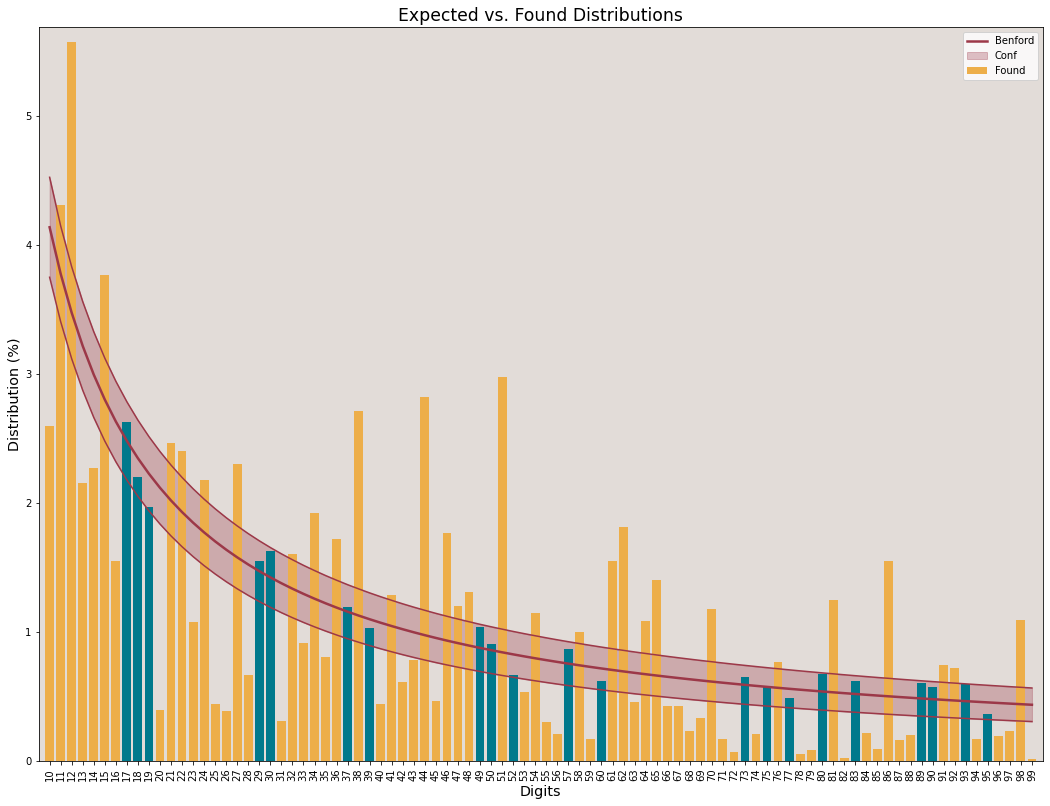

In [65]:
f2d = bf.first_digits(vl_licitacao_bf, digs=2, decimals=8, confidence=99)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (51, 44 e 38)

In [66]:
itens_digitos = item

# Convertendo a coluna de float para string

In [67]:
itens_digitos['VL_LICITACAO'] = itens_digitos['VL_LICITACAO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 34, 78 ou 91

In [68]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_LICITACAO'].str.startswith(('51', '44', '38'))])

In [69]:
dados_incosistentes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,68.0,2019,PRP,19536,2019,COM,ADH,MPR,...,C,1,1,1,Aquisição de Larvicida biológico BTI (Bacillus...,4000.00,UN,98.90,395600.0,J
35,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,70.0,2019,PRP,20172,2019,COM,ADH,MPR,...,C,1,1,1,"Copos de plástico tipo (PP), com 200ml de capa...",150.00,CX,223.86,33579.0,J
310,86400,PM DE VESPASIANO CORRÊA,6.0,2019,PRP,26,2019,COM,ADH,MPR,...,C,1,1,1,Aquisição de 400 (quatrocentos) litros de Biol...,400.00,L,103.00,41200.0,J
679,60100,PM DE SARANDI,95.0,2019,PRP,146,2019,COM,ADH,MPR,...,C,1,1,1,Camiseta manga curta escolar nos Tamanhos: 02 ...,1200.00,UN,15.32,18384.0,J
680,60100,PM DE SARANDI,95.0,2019,PRP,146,2019,COM,ADH,MPR,...,C,1,2,2,Camiseta manga curta escolar nos Tamanhos: 06...,1200.00,UN,16.50,19800.0,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20351,73200,PM DE VISTA GAÚCHA,9.0,2019,PRP,22,2019,COM,ADH,MPR,...,C,1,9,9,Tee Soldável de 20 mm,100.00,UN,0.60,60.0,J
20352,73200,PM DE VISTA GAÚCHA,9.0,2019,PRP,22,2019,COM,ADH,MPR,...,C,1,8,8,Joelho Soldável 90º de PVC de 25 mm,80.00,UN,0.45,36.0,J
20353,73200,PM DE VISTA GAÚCHA,9.0,2019,PRP,22,2019,COM,ADH,MPR,...,C,1,7,7,Joelho Soldável 90º de PVC de 20 mm,80.00,UN,0.38,30.4,J
20354,73200,PM DE VISTA GAÚCHA,9.0,2019,PRP,22,2019,COM,ADH,MPR,...,C,1,6,6,Cola de Cano 75g,200.00,UN,3.30,660.0,J


# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_LICITACAO

In [70]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE MAÇAMBARÁ                                    338
PM DE PLANALTO                                     184
PM DE FREDERICO WESTPHALEN                         158
PM DE ERNESTINA                                    154
PM DE SALDANHA MARINHO                             151
PM DE VISTA GAÚCHA                                 113
PM DE ALPESTRE                                      88
PM DE CAMPOS BORGES                                 88
PM DE IRAÍ                                          55
PM DE SEBERI                                        46
PM DE ANTA GORDA                                    42
PM DE ENCANTADO                                     26
PM DE ALTO ALEGRE                                   17
PM DE PELOTAS                                       11
PM DE SARANDI                                       10
PM DE IVOTI                                          7
PM DE PORTO ALEGRE                                   6
BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.            6
PM DE CAMP